# 01. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [3]:
%matplotlib inline

# 02. Importing Data

In [4]:
path = r'C:\Users\Rebecca\Library Funding and Literacy Rates'

In [5]:
path

'C:\\Users\\Rebecca\\Library Funding and Literacy Rates'

In [6]:
df_county = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'county_prepared.csv'), index_col = False, encoding='latin1')

In [7]:
df_county.head()

,Unnamed: 0.1,Unnamed: 0,FIPS_code,State,County,grpName,Lit_P1,Lit_P2,Lit_P3,Lit_A,...,Unemployed,Not_in_labor,OCC_Manage,OCC_Service,OCC_Sales,OCC_Natural,OCC_Military,OCC_Prod,No_Insurance,Total Literacy Score
0,0,0,1001,Alabama,Autauga County,all,0.205,0.384,0.411,261.7,...,0.037,0.287,0.348,0.179,0.226,0.081,0.011,0.153,0.088,Average Literacy
1,1,1,1003,Alabama,Baldwin County,all,0.161,0.347,0.493,270.3,...,0.040,0.288,0.361,0.180,0.257,0.096,0.000,0.106,0.108,Average Literacy
2,2,2,1005,Alabama,Barbour County,all,0.394,0.404,0.201,235.9,...,0.073,0.444,0.254,0.168,0.225,0.114,0.000,0.239,0.123,Average Literacy
3,3,3,1007,Alabama,Bibb County,all,0.269,0.454,0.277,248.1,...,0.048,0.442,0.245,0.178,0.196,0.153,0.000,0.228,0.081,Average Literacy
4,4,4,1009,Alabama,Blount County,all,0.248,0.370,0.382,258.5,...,0.029,0.402,0.286,0.129,0.233,0.158,0.000,0.193,0.110,Average Literacy


In [8]:
# Removing categorical columns

df_county_dropped = df_county.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'State', 'County', 'grpName', 'Total Literacy Score'])

In [9]:
df_county_dropped.head()

,FIPS_code,Lit_P1,Lit_P2,Lit_P3,Lit_A,POPULATION,Male,Female,White,Black,...,Employed,Unemployed,Not_in_labor,OCC_Manage,OCC_Service,OCC_Sales,OCC_Natural,OCC_Military,OCC_Prod,No_Insurance
0,1001,0.205,0.384,0.411,261.7,39765.0,0.489,0.511,0.766,0.191,...,0.662,0.037,0.287,0.348,0.179,0.226,0.081,0.011,0.153,0.088
1,1003,0.161,0.347,0.493,270.3,148385.0,0.489,0.511,0.865,0.095,...,0.670,0.040,0.288,0.361,0.180,0.257,0.096,0.000,0.106,0.108
2,1005,0.394,0.404,0.201,235.9,19450.0,0.533,0.467,0.466,0.480,...,0.483,0.073,0.444,0.254,0.168,0.225,0.114,0.000,0.239,0.123
3,1007,0.269,0.454,0.277,248.1,16970.0,0.543,0.457,0.767,0.221,...,0.511,0.048,0.442,0.245,0.178,0.196,0.153,0.000,0.228,0.081
4,1009,0.248,0.370,0.382,258.5,41955.0,0.494,0.506,0.955,0.016,...,0.568,0.029,0.402,0.286,0.129,0.233,0.158,0.000,0.193,0.110


In [10]:
df_county_dropped.shape

(34557, 36)

# 03. K-means Algorithm

### The Elbow Technique

In [11]:
# The elbow technique

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [12]:
score = [kmeans[i].fit(df_county_dropped).score(df_county_dropped) for i in range(len(kmeans))] 

score

C:\Users\Rebecca\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Rebecca\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Rebecca\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rebecca\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Rebecca\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi

[-286393341463021.2,
 -152896434653469.94,
 -93424137861344.22,
 -60795935185966.8,
 -39810161172252.76,
 -30224225805492.08,
 -24620456156494.793,
 -19211187949158.65,
 -16569375929604.246]

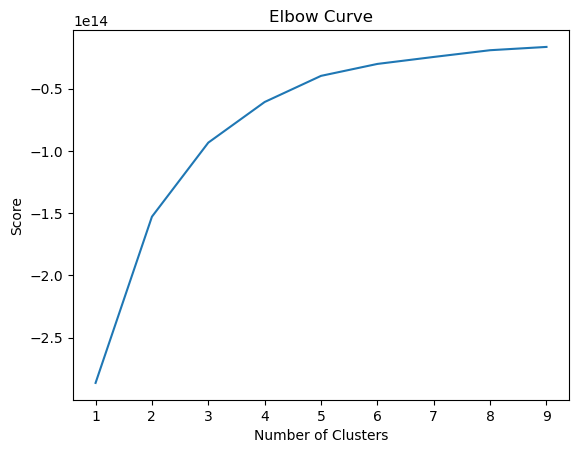

In [13]:
# Plot the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### This elbow curve starts to straighten out after 3 clusters. 

### K-Means Clustering

In [14]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [15]:
# Fit the k-means object to the data.

kmeans.fit(df_county_dropped)

KMeans(n_clusters=3)

In [16]:
df_county_dropped['clusters'] = kmeans.fit_predict(df_county_dropped)

In [17]:
df_county_dropped.head()

,FIPS_code,Lit_P1,Lit_P2,Lit_P3,Lit_A,POPULATION,Male,Female,White,Black,...,Unemployed,Not_in_labor,OCC_Manage,OCC_Service,OCC_Sales,OCC_Natural,OCC_Military,OCC_Prod,No_Insurance,clusters
0,1001,0.205,0.384,0.411,261.7,39765.0,0.489,0.511,0.766,0.191,...,0.037,0.287,0.348,0.179,0.226,0.081,0.011,0.153,0.088,0
1,1003,0.161,0.347,0.493,270.3,148385.0,0.489,0.511,0.865,0.095,...,0.040,0.288,0.361,0.180,0.257,0.096,0.000,0.106,0.108,0
2,1005,0.394,0.404,0.201,235.9,19450.0,0.533,0.467,0.466,0.480,...,0.073,0.444,0.254,0.168,0.225,0.114,0.000,0.239,0.123,0
3,1007,0.269,0.454,0.277,248.1,16970.0,0.543,0.457,0.767,0.221,...,0.048,0.442,0.245,0.178,0.196,0.153,0.000,0.228,0.081,0
4,1009,0.248,0.370,0.382,258.5,41955.0,0.494,0.506,0.955,0.016,...,0.029,0.402,0.286,0.129,0.233,0.158,0.000,0.193,0.110,0


In [18]:
# Checking cluster counts

df_county_dropped['clusters'].value_counts()

clusters
0    34035
2      492
1       30
Name: count, dtype: int64

### Cluster Visualizations

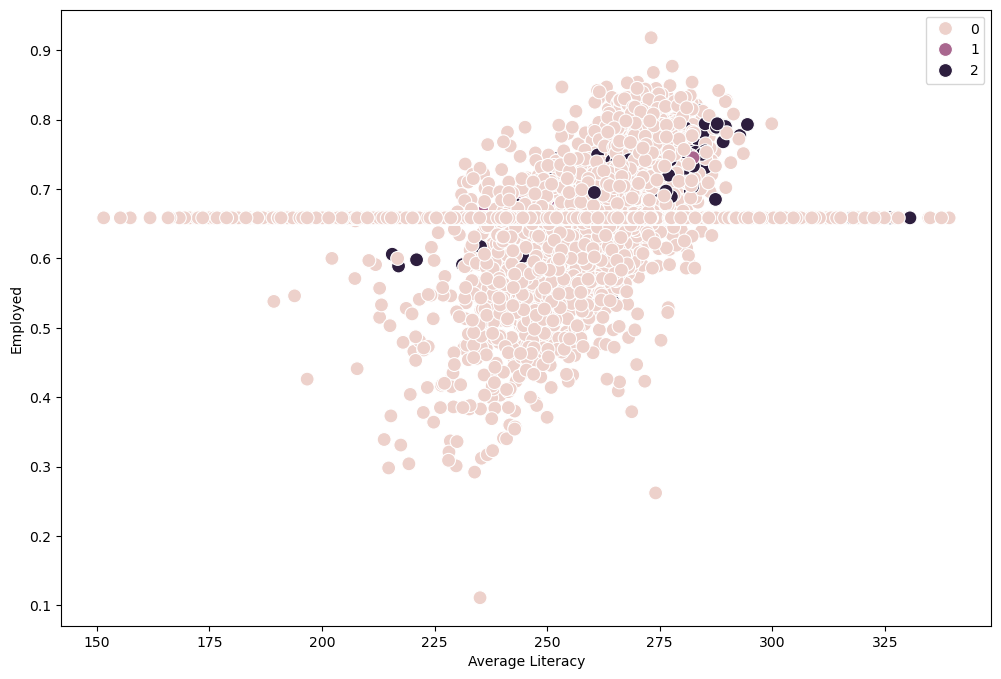

In [19]:
# Plot the clusters for the "Lit_A" and "Employed" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_county_dropped['Lit_A'], y=df_county_dropped['Employed'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Average Literacy')
plt.ylabel('Employed') 
plt.show()

#### Both values are grouped closely together and do trend upwards, which makes sense - higher literacy means higher employment. Most dots are grouped tightly together, meaning that there isn't a big difference between counties and the variables are strongly correlated. 

#### Please note that the almost solid horizontal line is due to imputing values due to lack of data.


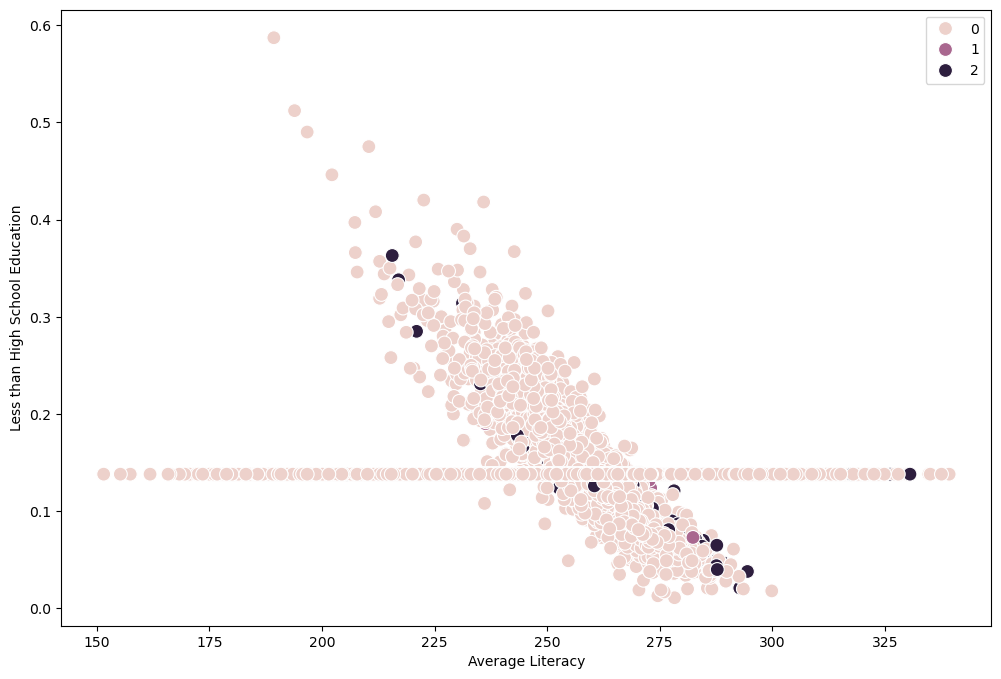

In [20]:
# Plot the clusters for the "Lit_A" and "Less_HS" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_county_dropped['Lit_A'], y=df_county_dropped['Less_HS'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Average Literacy')
plt.ylabel('Less than High School Education') 
plt.show()

#### This graph shows a distinct downward path, meaning as literacy goes up, the number of people with less than a high school education goes down. These data points are a bit more spread out throughout the downward trend (but are still tightly together), unlike the previous graph. Average Literacy and less than High School education may be slightly different between counties. 

#### Please note that the almost solid horizontal line is due to imputing values due to lack of data.


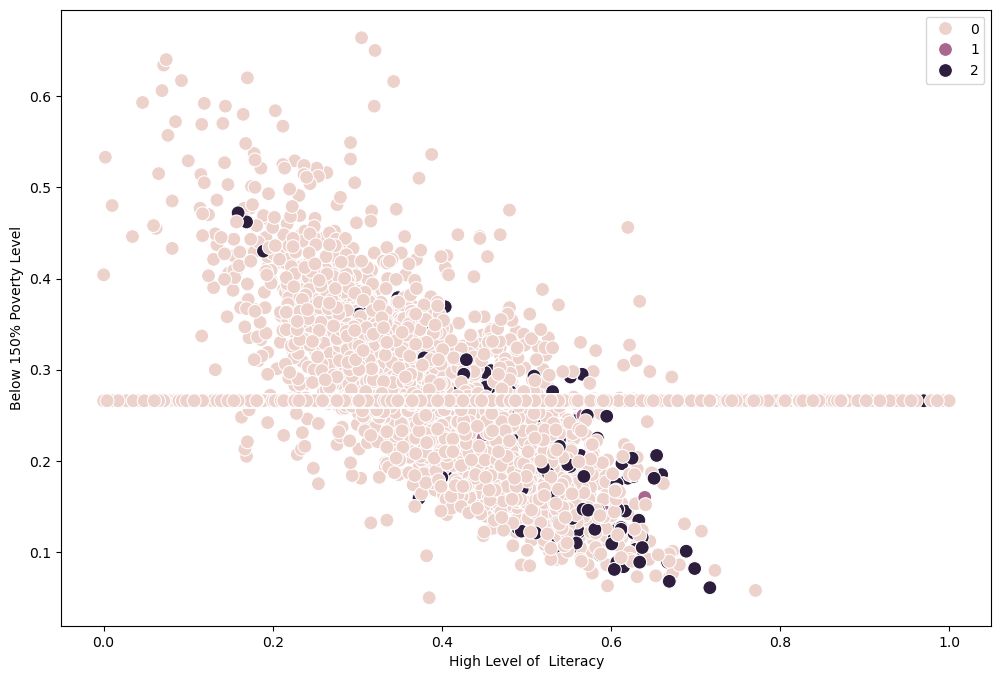

In [21]:
# Plot the clusters for the "Lit_P3" and "Poverty_150" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_county_dropped['Lit_P3'], y=df_county_dropped['Poverty_150'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('High Level of  Literacy')
plt.ylabel('Below 150% Poverty Level') 
plt.show()

#### This graph shows a downward path, showing that individuals who have a higher level of literacy have a low chance of being under poverty level. The clusters are fairly close together, so counties seem to be similar. 

#### Please note that the almost solid horizontal line is due to imputing values due to lack of data.


#### Overall, all scatterplots are showing clusters closely together and there are no scatterplots that showed clusters clustering together (separately), all of mine are all clustered together. This could mean that the data is too homogeneous and that there isn't a meaningful distinction between counties when we look at literacy, education, or employment. Perhaps this is due to having to impute a lot of values. Regardless, there doesn't seem to be any true subgroups in the county data set. 

### Descriptive Statistics

In [22]:
df_county_dropped.loc[df_county_dropped['clusters'] == 0, 'cluster'] = 'light pink'
df_county_dropped.loc[df_county_dropped['clusters'] == 1, 'cluster'] = 'pink'
df_county_dropped.loc[df_county_dropped['clusters'] == 2, 'cluster'] = 'purple'

In [23]:
df_county_dropped.groupby('cluster').agg({'Employed':['mean', 'median'], 
    'Lit_A':['mean', 'median'],
    'Less_HS':['mean', 'median'], 
    'Poverty_150':['mean', 'median'],
    'Lit_P3':['mean', 'median']})

Employed                 Lit_A           Less_HS            \
                mean    median        mean  median      mean    median   
cluster                                                                  
light pink  0.658115  0.658417  257.475469  259.30  0.138266  0.138088   
pink        0.676259  0.671500  255.513333  258.30  0.152093  0.138088   
purple      0.677982  0.658417  266.921748  267.85  0.124766  0.138088   

           Poverty_150              Lit_P3          
                  mean    median      mean  median  
cluster                                             
light pink    0.266316  0.265968  0.387326  0.3820  
pink          0.256157  0.265968  0.435367  0.4090  
purple        0.242669  0.265968  0.502413  0.4895

#### Clusters with highest means: 
    Employed: pink
    Averge Literacy: pink
    Less than high school education: purple
    Below 150% poverty: purple
    Low Literacy: pink

# 04. Future Steps for Analysis

#### The purple cluster has the highest mean in two groups: Less than high school education and below 150% poverty. This signifies that the purple group is less educated and also below poverty. I'd like to know which counties and states primarily make up this cluster and how this audience compares to the public library data set.
#### The pink data set's mean is highest in the Employed, Average Literacy, and Low Literacy groups. We've discovered previously that in order for individuals to be employed, they do not need to or have higher literacy. We discovered in Task 6.2 that Low Literacy is the smallest sub-group of literacy, so it's interesting that the pink group has the highest mean. More research into that group, especially those with low literacy, would be needed. 

In [24]:
# Exporting cluster dataset

df_county_dropped.to_csv(os.path.join(path, '02 Data','Prepared Data', 'county_with_clusters.csv'))